In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [106]:
df = pd.read_csv('data/train.csv')

In [107]:
df = df[[
    'SalePrice',
    'LotArea',
    'TotalBsmtSF',
    'BsmtQual',
    'GrLivArea',
    '1stFlrSF',
    'Fireplaces',
    'FireplaceQu',
]]

# target_mean = df['SalePrice'].mean()
# target_std = df['SalePrice'].std()

In [108]:
df.head()

,SalePrice,LotArea,TotalBsmtSF,BsmtQual,GrLivArea,1stFlrSF,Fireplaces,FireplaceQu
0,208500,8450,856,Gd,1710,856,0,NaN
1,181500,9600,1262,Gd,1262,1262,1,TA
2,223500,11250,920,Gd,1786,920,1,TA
3,140000,9550,756,TA,1717,961,1,Gd
4,250000,14260,1145,Gd,2198,1145,1,TA


### Continious Features

In [109]:
continiousRV = df[[
    'SalePrice',
    'LotArea',
    'TotalBsmtSF',
    'GrLivArea',
    '1stFlrSF',  
]]

continiousRV

,SalePrice,LotArea,TotalBsmtSF,GrLivArea,1stFlrSF
0,208500,8450,856,1710,856
1,181500,9600,1262,1262,1262
2,223500,11250,920,1786,920
3,140000,9550,756,1717,961
4,250000,14260,1145,2198,1145
...,...,...,...,...,...
1455,175000,7917,953,1647,953
1456,210000,13175,1542,2073,2073
1457,266500,9042,1152,2340,1188
1458,142125,9717,1078,1078,1078


In [110]:
continiousRV.isna().sum()

SalePrice      0
LotArea        0
TotalBsmtSF    0
GrLivArea      0
1stFlrSF       0
dtype: int64

In [111]:
scaler = StandardScaler()

In [112]:
scaler.fit(continiousRV)

StandardScaler()

In [113]:
scaled_data = scaler.transform(continiousRV)
scaled_data

array([[ 0.34727322, -0.20714171, -0.45930254,  0.37033344, -0.79343379],
       [ 0.00728832, -0.09188637,  0.46646492, -0.48251191,  0.25714043],
       [ 0.53615372,  0.07347998, -0.31336875,  0.51501256, -0.62782603],
       ...,
       [ 1.07761115, -0.14781027,  0.21564122,  1.56964722,  0.06565646],
       [-0.48852299, -0.08016039,  0.04690528, -0.83278768, -0.21898188],
       [-0.42084081, -0.05811155,  0.45278362, -0.49393395,  0.2416147 ]])

In [115]:
df[continiousRV.columns] = scaled_data

In [116]:
df

,SalePrice,LotArea,TotalBsmtSF,BsmtQual,GrLivArea,1stFlrSF,Fireplaces,FireplaceQu
0,0.347273,-0.207142,-0.459303,Gd,0.370333,-0.793434,0,NaN
1,0.007288,-0.091886,0.466465,Gd,-0.482512,0.257140,1,TA
2,0.536154,0.073480,-0.313369,Gd,0.515013,-0.627826,1,TA
3,-0.515281,-0.096897,-0.687324,TA,0.383659,-0.521734,1,Gd
4,0.869843,0.375148,0.199680,Gd,1.299326,-0.045611,1,TA
...,...,...,...,...,...,...,...,...
1455,-0.074560,-0.260560,-0.238122,Gd,0.250402,-0.542435,1,TA
1456,0.366161,0.266407,1.104925,Gd,1.061367,2.355701,2,TA
1457,1.077611,-0.147810,0.215641,TA,1.569647,0.065656,2,Gd
1458,-0.488523,-0.080160,0.046905,TA,-0.832788,-0.218982,0,NaN


### Descrete Features

In [118]:
df[[
    'BsmtQual',
    'Fireplaces',
    'FireplaceQu',
]].isna().sum()

BsmtQual        37
Fireplaces       0
FireplaceQu    690
dtype: int64

#### Updating null values in BsmtQual to Unknown

In [119]:
df['BsmtQual'] = df['BsmtQual'].fillna(value = 'Unknown')

#### Merging all Fireplaces more than 0 to 1 to make it binary

In [120]:
df.loc[df['Fireplaces'] != 0, 'Fireplaces'] = 1

#### Updating null values in BsmtQual to Unknown

In [121]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(value = 'Unknown')

In [122]:
descreteRV = df[[
    'BsmtQual',
    'Fireplaces',
    'FireplaceQu',
]]

In [123]:
descreteRV.isna().sum()

BsmtQual       0
Fireplaces     0
FireplaceQu    0
dtype: int64

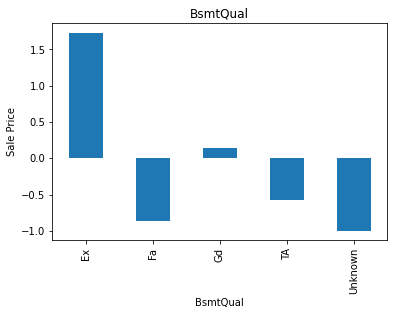

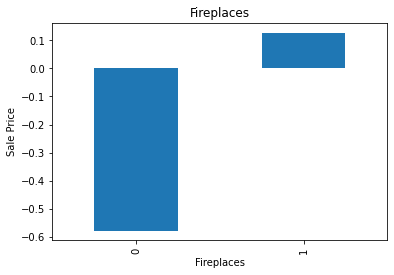

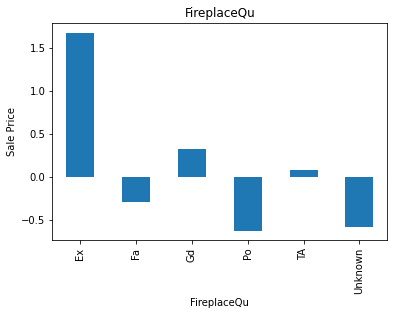

In [124]:
for feature in descreteRV:
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature)
    plt.show()

In [125]:
group = df.groupby('FireplaceQu')['SalePrice'].median()

In [131]:
group

FireplaceQu
Ex         1.678881
Fa        -0.288624
Gd         0.327756
Po        -0.622313
TA         0.082841
Unknown   -0.578241
Name: SalePrice, dtype: float64

In [132]:
for feature in descreteRV:
    group = df.groupby(feature)['SalePrice'].median()
    for i in range(len(group.index)):
        df.loc[df[feature] == group.index[i], feature] = group[i]

In [133]:
df

,SalePrice,LotArea,TotalBsmtSF,BsmtQual,GrLivArea,1stFlrSF,Fireplaces,FireplaceQu
0,0.347273,-0.207142,-0.459303,0.140386,0.370333,-0.793434,-0.578241,-0.578241
1,0.007288,-0.091886,0.466465,0.140386,-0.482512,0.257140,0.126913,0.082841
2,0.536154,0.073480,-0.313369,0.140386,0.515013,-0.627826,0.126913,0.082841
3,-0.515281,-0.096897,-0.687324,-0.571945,0.383659,-0.521734,0.126913,0.327756
4,0.869843,0.375148,0.199680,0.140386,1.299326,-0.045611,0.126913,0.082841
...,...,...,...,...,...,...,...,...
1455,-0.074560,-0.260560,-0.238122,0.140386,0.250402,-0.542435,0.126913,0.082841
1456,0.366161,0.266407,1.104925,0.140386,1.061367,2.355701,0.126913,0.082841
1457,1.077611,-0.147810,0.215641,-0.571945,1.569647,0.065656,0.126913,0.327756
1458,-0.488523,-0.080160,0.046905,-0.571945,-0.832788,-0.218982,-0.578241,-0.578241


## Training

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [135]:
X = df.drop('SalePrice', axis = 1)

In [136]:
y = df['SalePrice']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [138]:
model = LinearRegression()

In [139]:
model.fit(X_train, y_train)

LinearRegression()

In [140]:
y_pred = model.predict(X_test)

In [142]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.20443391716776055


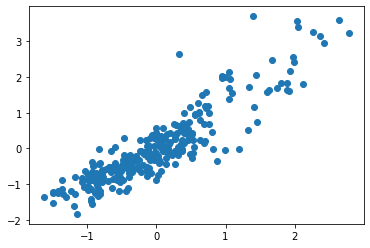

In [143]:
plt.scatter(y_pred, y_test)
plt.show()

In [151]:
(y_test / y_pred).mean()

1.8344659386587434

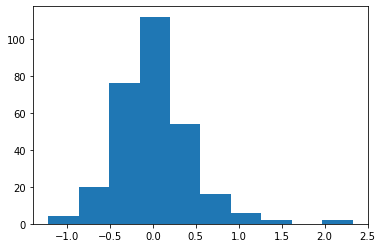

In [152]:
err = y_test - y_pred
plt.hist(err)
plt.show()

In [153]:
err.describe()

count    292.000000
mean       0.019312
std        0.452507
min       -1.216462
25%       -0.244525
50%        0.001087
75%        0.224545
max        2.326724
Name: SalePrice, dtype: float64

In [154]:
adj_pred = y_pred + err.mean()

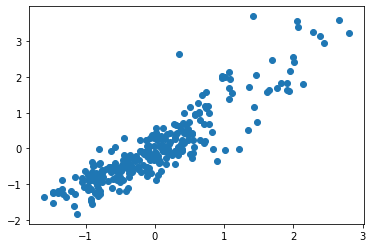

In [155]:
plt.scatter(adj_pred, y_test)
plt.show()

In [156]:
(y_test / adj_pred).mean()

1.0225848148132606